In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Kaggle Link
https://www.kaggle.com/c/facial-keypoints-detection

## Data Introduction 

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

*left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip*

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are missing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

### Data files

- *training.csv*: list of training 7049 images. Each row contains the (x,y) coordinates for *15* keypoints, and image data as *row-ordered* list of pixels.
- *test.csv*: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
- *submissionFileFormat.csv*: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict. 

# Loading Test & Traininig data
---

In [2]:
df_train = pd.read_csv('../Data/facialkeypoints-training.csv')
df_train.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [3]:
df_train.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [4]:
df_train.iloc[0].to_frame()

,0
left_eye_center_x,66.0336
left_eye_center_y,39.0023
right_eye_center_x,30.227
right_eye_center_y,36.4217
left_eye_inner_corner_x,59.5821
left_eye_inner_corner_y,39.6474
left_eye_outer_corner_x,73.1303
left_eye_outer_corner_y,39.97
right_eye_inner_corner_x,36.3566
right_eye_inner_corner_y,37.3894


Lot's of NaNs...

In [5]:
df_train.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [6]:
df_valid = pd.read_csv('../Data/facialkeypoints-test.csv')
df_valid.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


# Pre-Processing

In the pre-processing step, an ```np.array``` is going to be derived from the **Image** key values, for each image. The color space is also going to be rescaled to 0-1.

In [7]:
def pre_process(df):
    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df = df.copy()
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    df = df.dropna()
    df['Image'] = df['Image'] / 255.
    
    return df

In [8]:
df_train = pre_process(df_train)
df_valid = pre_process(df_valid)

In [9]:
X_train = np.array(list(df_train['Image'].values))
y_train = np.array(list(df_train.drop(['Image'], axis=1).values))
X_valid = np.array(list(df_valid['Image'].values))

In [10]:
size = 96
half = size/2

In [11]:
y_train = (y_train-(half))/half

In [12]:
X_train.shape

(2140, 9216)

In [13]:
y_train.shape

(2140, 30)

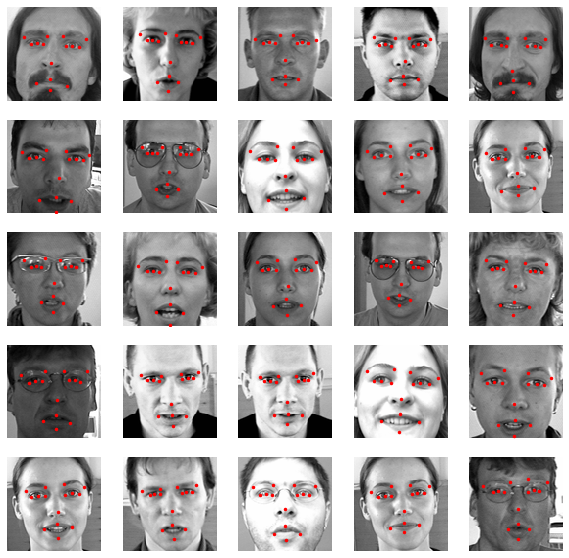

In [14]:
f, axes = plt.subplots(5, 5, figsize=(10, 10))
for index, image in enumerate(X_train[:25]):
    axes[int(index/5)][int(index%5)].imshow(image.reshape(size, size), cmap='gray', interpolation='nearest')
    axes[int(index/5)][int(index%5)].set_xticks(np.array([]))
    axes[int(index/5)][int(index%5)].set_yticks(np.array([]))
    p = y_train[index]
    axes[int(index/5)][int(index%5)].plot(p[0::2]*half+half, p[1::2]*half+half, 'r.')

# Models

In [15]:
def plot_history(history, x, y):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.figure(figsize=(x, y))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(x, y))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

In [16]:
n_targets = 30

### One Single Hidden Layer

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import optimizers

Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(Dense(100, input_dim=size*size))
model.add(Activation('relu'))
model.add(Dense(n_targets))

sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


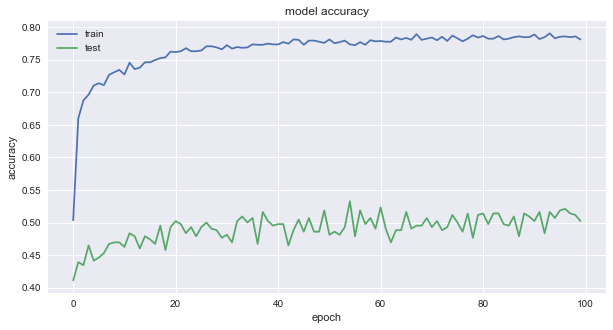

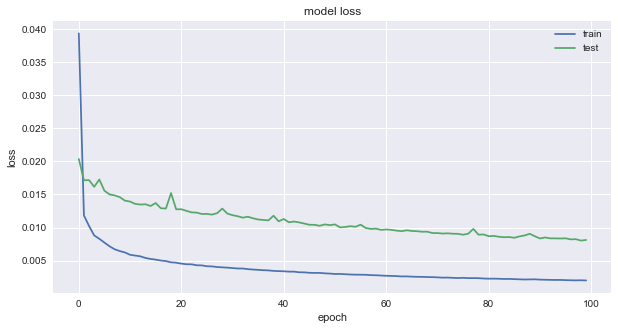

In [19]:
plot_history(hist, 10, 5)

In [20]:
y_pred = model.predict(X_valid)

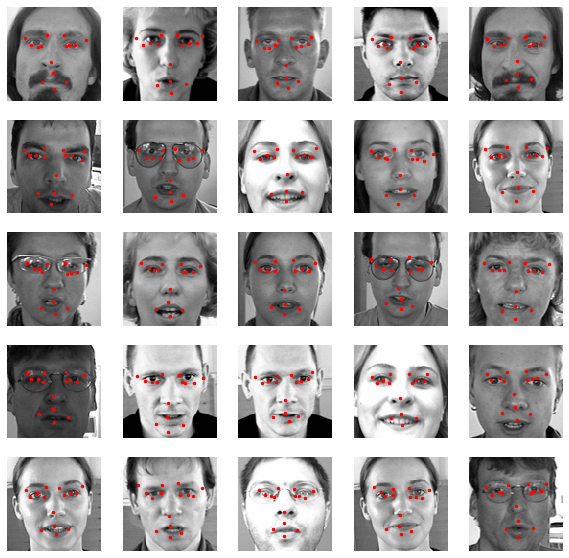

In [21]:
f, axes = plt.subplots(5, 5, figsize=(10, 10))
for index, image in enumerate(X_train[:25]):
    axes[int(index/5)][int(index%5)].imshow(image.reshape(size, size), cmap='gray', interpolation='nearest')
    axes[int(index/5)][int(index%5)].set_xticks(np.array([]))
    axes[int(index/5)][int(index%5)].set_yticks(np.array([]))
    p = y_pred[index]
    axes[int(index/5)][int(index%5)].plot(p[0::2]*half+half, p[1::2]*half+half, 'r.')

### CNN

In [22]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [23]:
input_shape = (size, size, 1)

In [24]:
X_train = X_train.astype('float32').reshape(X_train.shape[0], size, size, 1)
X_valid = X_valid.astype('float32').reshape(X_valid.shape[0], size, size, 1)

In [25]:
X_train.shape

(2140, 96, 96, 1)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))    
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(n_targets))    
    
sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.20)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


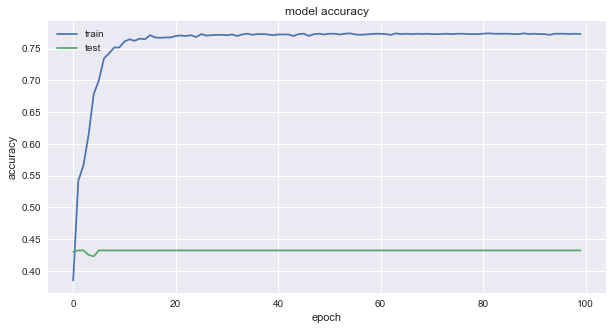

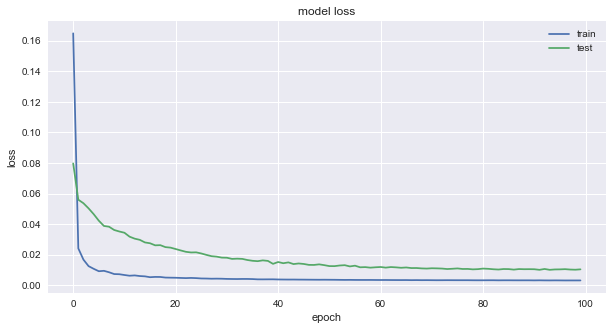

In [27]:
plot_history(hist, 10, 5)

In [28]:
y_pred = model.predict(X_valid)

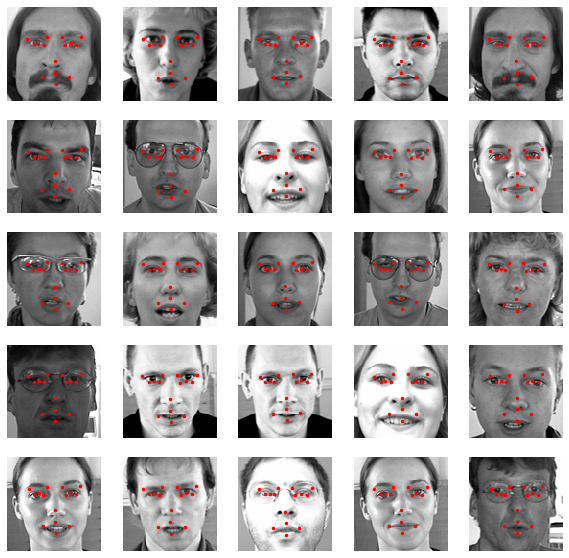

In [29]:
f, axes = plt.subplots(5, 5, figsize=(10, 10))
for index, image in enumerate(X_train[:25]):
    axes[int(index/5)][int(index%5)].imshow(image.reshape(size, size), cmap='gray', interpolation='nearest')
    axes[int(index/5)][int(index%5)].set_xticks(np.array([]))
    axes[int(index/5)][int(index%5)].set_yticks(np.array([]))
    p = y_pred[index]
    axes[int(index/5)][int(index%5)].plot(p[0::2]*half+half, p[1::2]*half+half, 'r.')